# 七 RandomForest随机森林

## 1 Bagging

- 基本流程
  
    随机采样出T个含m个训练样本的采样集，然后基于每个采样集训练出一个基学习器，再将这些基学习器进行结合。在对预测输出进行结合时，Bagging通常对分类任务使用简单投票法，对回归任务使用简单平均法

- 算法描述

    输入： 
    
    训练集$D={(x_1,y_1),(x_2,y_2),...,(x_m,y_m)}$
       基学习算法$\xi$
       训练轮次T
    
    过程：

    1. for t=1,2,3..T do
    2. $h_t=\xi(D,D_{bs})$
    3. end for

    输出：

$$
H(x)=arg\max\limits_{y∈Y}\displaystyle\sum_{t=1}^TII(h_t(x)=y)
$$


## 2 随机森林

- 随机森林(Random Forest,简称RF)
  
    是Bagging的一个扩展变体.RF在以决策树为基学习器构建Bagging集成的基础上，进一步在决策树的训练过程中引入了随机属性选择.具体来说，传统决策树在选择划分属性时是在当前结点的属性集合(假定有d个属性)中选择-一个最优属性;而在RF中,对基决策树的每个结点，先从该结点的属性集合中随机选择一个包含k个属性的子集，然后再从这个子集中选择一个最优属性用于划分.这里的参数k控制了随机性的引入程度:若令k=d,则基决策树的构建与传统决策树相同;若令k= 1,则是随机选择-一个属性用于划分;一般情况下，推荐值$k = log_2d$

- sklearn

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

wine = load_wine()#使用葡萄酒数据集
print(f"所有特征：{wine.feature_names}")
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

所有特征：['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [2]:
#1、构建并训练决策树分类器，这里特征选择标准使用基尼指数，树的最大深度为1
base_model = DecisionTreeClassifier(max_depth=1, criterion='gini',random_state=42).fit(X_train, y_train)
y_pred = base_model.predict(X_test)#对训练集进行预测
print(f"决策树的准确率：{accuracy_score(y_test,y_pred):.3f}")

决策树的准确率：0.667


In [3]:
# 2、bagging
from sklearn.ensemble import BaggingClassifier
# 建立AdaBoost分类器，每个基本分类模型为在前面训练数据的一个随机子集上训练得到的的决策树模型，最大的弱学习器的个数为50
model = BaggingClassifier(estimator=base_model,
                            n_estimators=50,
                            random_state=42)
model.fit(X_train, y_train)# 训练
y_pred = model.predict(X_test)# 预测
print(f"BaggingClassifier的准确率：{accuracy_score(y_test,y_pred):.3f}")

BaggingClassifier的准确率：0.861


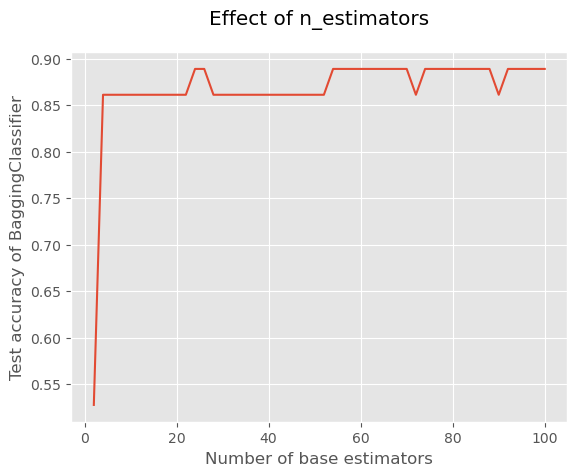

In [4]:
# 测试估计器个数的影响
x = list(range(2, 102, 2))# 估计器个数即n_estimators，在这里我们取[2,102]的偶数
y = []

for i in x:
    model = BaggingClassifier(estimator=base_model,
                              n_estimators=i,
                              
                              random_state=42)
  
    model.fit(X_train, y_train)
    model_test_sc = accuracy_score(y_test, model.predict(X_test))
    y.append(model_test_sc)

plt.style.use('ggplot')
plt.title("Effect of n_estimators", pad=20)
plt.xlabel("Number of base estimators")
plt.ylabel("Test accuracy of BaggingClassifier")
plt.plot(x, y)
plt.show()

In [5]:
# 3、随机森林
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
                            n_estimators=50,
                            random_state=42)
model.fit(X_train, y_train)# 训练
y_pred = model.predict(X_test)# 预测
print(f"RandomForestClassifier的准确率：{accuracy_score(y_test,y_pred):.3f}")

RandomForestClassifier的准确率：1.000


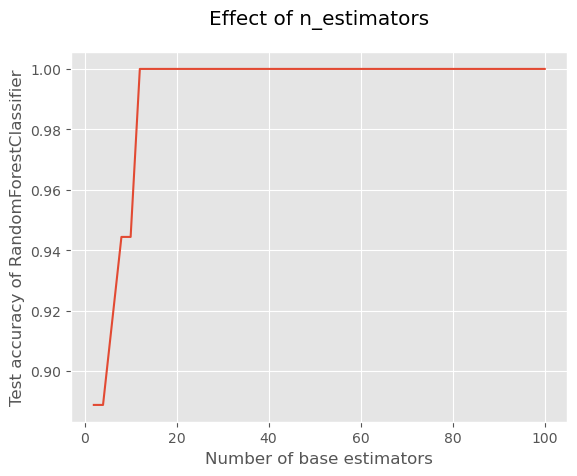

In [6]:
x = list(range(2, 102, 2))# 估计器个数即n_estimators，在这里我们取[2,102]的偶数
y = []

for i in x:
    model = RandomForestClassifier(
                              n_estimators=i,
                              
                              random_state=42)
  
    model.fit(X_train, y_train)
    model_test_sc = accuracy_score(y_test, model.predict(X_test))
    y.append(model_test_sc)

plt.style.use('ggplot')
plt.title("Effect of n_estimators", pad=20)
plt.xlabel("Number of base estimators")
plt.ylabel("Test accuracy of RandomForestClassifier")
plt.plot(x, y)
plt.show()